# Simple example for the Presentation

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2724185244626320968
xla_global_id: -1
]


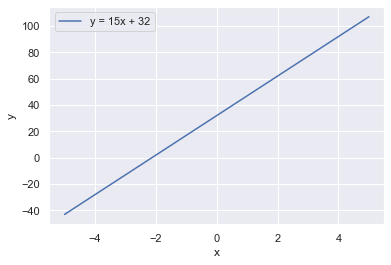

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()


fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.5)

a, b = 15, 32
x = np.linspace(-5, 5, 300)
y = a*x + b


ax.plot(x, y, label = "y = "+str(a)+"x + "+str(b))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
# ax.legend()

plt.show()

In [ ]:
data = pd.DataFrame({})
data['x'] = x
data['y'] = y

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['y']
Predictors=['x']

X=data[Predictors].values
y=data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 1)
(210, 1)
(90, 1)
(90, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=1, input_dim=1, kernel_initializer='normal', activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 1, epochs = 20, verbose=1)

Epoch 1/20
210/210 [==============================] - 0s 526us/step - loss: 0.6482
Epoch 2/20
210/210 [==============================] - 0s 536us/step - loss: 0.4371
Epoch 3/20
210/210 [==============================] - 0s 526us/step - loss: 0.2837
Epoch 4/20
210/210 [==============================] - 0s 531us/step - loss: 0.1751
Epoch 5/20
210/210 [==============================] - 0s 517us/step - loss: 0.1025
Epoch 6/20
210/210 [==============================] - 0s 522us/step - loss: 0.0563
Epoch 7/20
210/210 [==============================] - 0s 531us/step - loss: 0.0286
Epoch 8/20
210/210 [==============================] - 0s 526us/step - loss: 0.0134
Epoch 9/20
210/210 [==============================] - 0s 526us/step - loss: 0.0057
Epoch 10/20
210/210 [==============================] - 0s 541us/step - loss: 0.0021
Epoch 11/20
210/210 [==============================] - 0s 550us/step - loss: 7.1593e-04
Epoch 12/20
210/210 [==============================] - 0s 541us/step - loss: 2.08

3/3 [==============================] - 0s 1000us/step
The Accuracy of ANN model is: 99.99069389244058


[<tf.Variable 'dense_28/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.99996936]], dtype=float32)>, <tf.Variable 'dense_28/bias:0' shape=(1,) dtype=float32, numpy=array([4.8449647e-06], dtype=float32)>]


3/3 [==============================] - 0s 1000us/step
The Accuracy of ANN model is: 70.73115220118049


[<tf.Variable 'dense_29/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.3007907]], dtype=float32)>, <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([0.00340911], dtype=float32)>]


3/3 [==============================] - 0s 1000us/step
The Accuracy of ANN model is: -139.53980873191702


[<tf.Variable 'dense_30/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.91602546]], dtype=float32)>, <tf.Variable 'dense_30/bias:0' shape=(1,) dtype=float32, numpy=array([0.08059379], dtype=float32)>]


3/3 [==============================] - 0s 1ms/step
The Ac

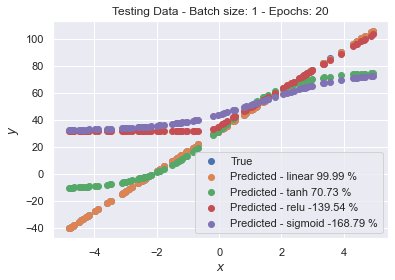

In [ ]:
act_list = ['linear', 'tanh','relu','sigmoid']
metr = 0
# act_func = 'linear'
for act_func in act_list:
    metr+=1
    
    model = Sequential()
    model.add(Dense(units=1, input_dim=X_train.shape[1], kernel_initializer='normal', activation=act_func))

    model.compile(loss='mean_squared_error', optimizer='adam')


    model.fit(X_train, y_train ,batch_size = 1, epochs = 20, verbose=0)

    Predictions=model.predict(X_test)

    Predictions=TargetVarScalerFit.inverse_transform(Predictions)

    y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

    Test_Data=PredictorScalerFit.inverse_transform(X_test)

    if metr == 1:
        TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
#         TestingData['x'] = y_test_orig.T[0]
        TestingData['y'] = y_test_orig.T[0]


#     TestingData['x_pred'+str(metr)] = Predictions.T[0]
    TestingData['y_pred'+str(metr)] = Predictions.T[0]

    APE=100*np.abs((TestingData.y.values-TestingData['y_pred'+str(metr)].values)/TestingData.y.values)
    TestingData['APE']=APE

    print('The Accuracy of ANN model is:', 100-np.mean(APE))
    
    acc = round(100-np.mean(APE),2)
    import matplotlib.pyplot as plt
    if metr == 1:
        y1 = TestingData.y.values
        x1 = TestingData.x.values

    y2 = TestingData['y_pred'+str(metr)].values
#     x2 = TestingData['x_pred'+str(metr)].values
    
    if metr == 1:
        plt.scatter(x1,y1, label = 'True')
    
    plt.scatter(x1,y2, label = 'Predicted - '+act_func+' '+str(acc)+' %')
    plt.legend()
    plt.xlabel('$ x $')
    plt.ylabel('$ y $')
    print('\n')
    print(model.trainable_variables)
    print('\n')
    plt.title('Testing Data - Batch size: 1 - Epochs: 20')

In [ ]:
x = np.linspace(-2,2,100)
def lin(x):
    return x

def step(x):
    if x<0:
        return 0
    else:
        return 1

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0,x)

def softplus(x):
    return np.log(1+np.exp(x))

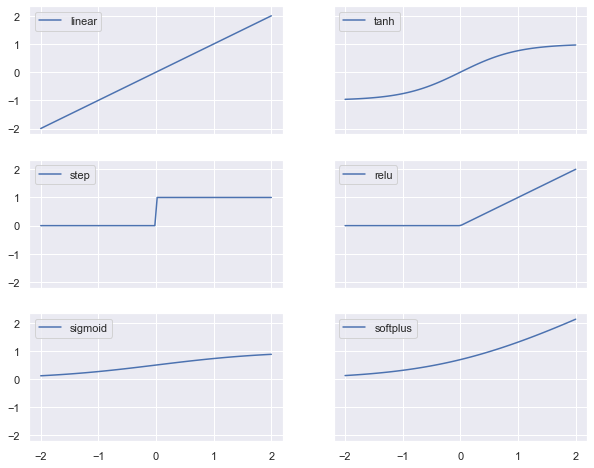

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(10, 8), sharex = True, sharey = True)
for i in range(3):
    for j in range(3):
        
        if (i,j) == (0,0):
            
            y = []
            for k in x:
                y.append(lin(k))
            y = np.array(y)
            
            ax[i,j].plot(x, y, label = 'linear')
            ax[i,j].legend(loc = 2)
        
        if (i,j) == (1,0):
            y = []
            for k in x:
                y.append(step(k))
            y = np.array(y)
            ax[i,j].plot(x, y, label = 'step')
            ax[i,j].legend(loc = 2)
            
        if (i,j) == (2,0):
            y = []
            for k in x:
                y.append(sigmoid(k))
            y = np.array(y)
            ax[i,j].plot(x, y, label = 'sigmoid')
            ax[i,j].legend(loc = 2)
            
        if (i,j) == (0,1):
            y = []
            for k in x:
                y.append(tanh(k))
            y = np.array(y)
            ax[i,j].plot(x, y, label = 'tanh')
            ax[i,j].legend(loc = 2)
            
        if (i,j) == (1,1):
            y = []
            for k in x:
                y.append(relu(k))
            y = np.array(y)
            ax[i,j].plot(x, y, label = 'relu')
            ax[i,j].legend(loc = 2)
            
        if (i,j) == (2,1):
            y = []
            for k in x:
                y.append(softplus(k))
            y = np.array(y)
            ax[i,j].plot(x, y, label = 'softplus')
            ax[i,j].legend(loc = 2)

# Tabulated EOS - Numerical solution from Prof. Stergioulas TOV solver.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

data = pd.read_pickle(r'C:\Users\admin\Desktop\Γιάννης\Πτυχιακή\files\TOV_tab_data.pkl')
data

,rho_c,M,R
0,5.500000e+14,0.507957,11.406522
1,5.555112e+14,0.518044,11.384600
2,5.610776e+14,0.528298,11.371477
3,5.666999e+14,0.538717,11.351460
4,5.723784e+14,0.549303,11.341045
...,...,...,...
195,3.843611e+15,1.686128,8.320061
196,3.882126e+15,1.682408,8.296979
197,3.921026e+15,1.678653,8.274018
198,3.960316e+15,1.674867,8.251185


In [ ]:
TargetVariable=['M','R']
Predictors=['rho_c']

X=data[Predictors].values
y=data[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense



model = Sequential()

model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))


model.add(Dense(2, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 5, epochs = 50, verbose=1)

Epoch 1/50
28/28 [==============================] - 0s 815us/step - loss: 1.0551
Epoch 2/50
28/28 [==============================] - 0s 778us/step - loss: 1.0493
Epoch 3/50
28/28 [==============================] - 0s 741us/step - loss: 0.9589
Epoch 4/50
28/28 [==============================] - 0s 778us/step - loss: 0.4986
Epoch 5/50
28/28 [==============================] - 0s 741us/step - loss: 0.1768
Epoch 6/50
28/28 [==============================] - 0s 741us/step - loss: 0.1636
Epoch 7/50
28/28 [==============================] - 0s 778us/step - loss: 0.1492
Epoch 8/50
28/28 [==============================] - 0s 704us/step - loss: 0.1393
Epoch 9/50
28/28 [==============================] - 0s 741us/step - loss: 0.1347
Epoch 10/50
28/28 [==============================] - 0s 778us/step - loss: 0.1257
Epoch 11/50
28/28 [==============================] - 0s 741us/step - loss: 0.1173
Epoch 12/50
28/28 [==============================] - 0s 778us/step - loss: 0.1073
Epoch 13/50
28/28 [======

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    batch_size_list=[5, 8, 10]
    epoch_list  =   [50, 100, 200]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            temp = pd.DataFrame({})
            
            TrialNumber+=1
            
            model = Sequential()
            
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))

            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            
            model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))
            
            model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))
            
            model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))

            model.add(Dense(2, kernel_initializer='normal'))

            model.compile(loss='mean_squared_error', optimizer='adam')

            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
            y_mod       = model.predict(X_test)
            y_mod_norm  = np.sqrt(y_mod.T[0]**2 + y_mod.T[1]**2)
            y_test_norm = np.sqrt(y_test.T[0]**2 + y_test.T[1]**2)
            
            MAPE = np.mean(100 * (np.abs(y_test_norm-y_mod_norm)/y_test_norm))
            
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            temp = pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )
            
            frames = [SearchResultsData,temp]
            
            SearchResultsData = pd.concat(frames, ignore_index = True)
    return(SearchResultsData)



ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

2/2 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 50 Accuracy: 98.21589593726266
2/2 [==============================] - 0s 1000us/step
2 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.13530790960849
2/2 [==============================] - 0s 1000us/step
3 Parameters: batch_size: 5 - epochs: 200 Accuracy: 99.43805800793525
2/2 [==============================] - 0s 1000us/step
4 Parameters: batch_size: 8 - epochs: 50 Accuracy: 96.93976247770861
2/2 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 8 - epochs: 100 Accuracy: 99.36389415714477
2/2 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 8 - epochs: 200 Accuracy: 99.19009944638377
2/2 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 97.21686480334593
2/2 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 99.0338998389054
2/2 [====================

<AxesSubplot:xlabel='Parameters'>

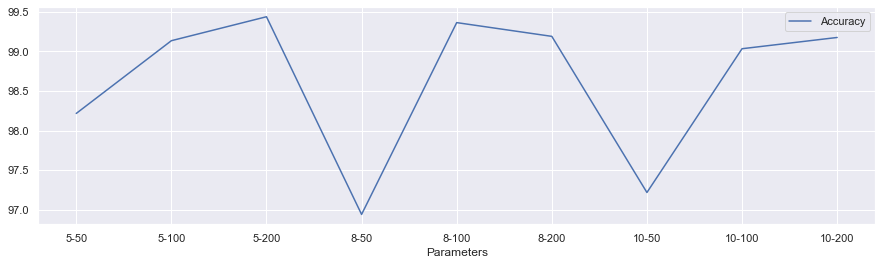

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

2/2 [==============================] - 0s 2ms/step
The Accuracy of ANN model is: 99.93617960408989


Text(0.5, 1.0, 'Testing Data')

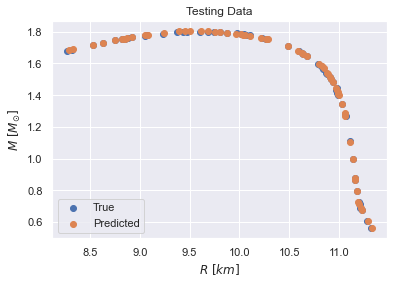

In [ ]:
model = Sequential()
model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))


model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=25, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))



model.add(Dense(2, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train ,batch_size = 5, epochs = 200, verbose=0)

Predictions=model.predict(X_test)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)

y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)

TestingData['M'] = y_test_orig.T[0]
TestingData['R'] = y_test_orig.T[1]

TestingData['M_pred'] = Predictions.T[0]
TestingData['R_pred'] = Predictions.T[1]

Testing_norm   = np.sqrt(TestingData.M.values**2 + TestingData.R.values**2)
Predicted_norm = np.sqrt(TestingData.M_pred.values**2 + TestingData.R_pred.values**2)

APE=100*(abs(Testing_norm-Predicted_norm)/Testing_norm)
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))

import matplotlib.pyplot as plt
x1 = TestingData.R.values
y1 = TestingData.M.values

x2 = TestingData.R_pred.values
y2 = TestingData.M_pred.values

plt.scatter(x1,y1, label = 'True')
plt.scatter(x2,y2, label = 'Predicted')
plt.legend()
plt.xlabel('$ R \ [km] $')
plt.ylabel('$ M \ [M_{\odot}] $')
plt.title('Testing Data')

5/5 [==============================] - 0s 750us/step


Text(0.5, 1.0, 'Trial data')

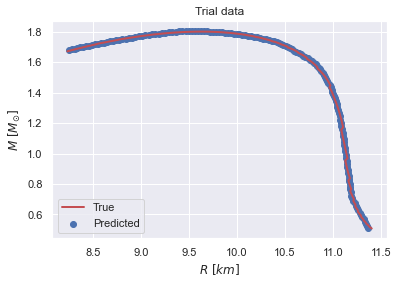

In [ ]:
import math
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

X = np.array([np.logspace(math.log10(min(data.rho_c)), math.log10(max(data.rho_c)), num = 150, base=10),]).T

trial_df = pd.DataFrame({})

trial_df['rho_c'] = X.T[0]


X=PredictorScalerFit.transform(X)

Predictions=model.predict(X)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)




trial_df['M_pred'] = Predictions.T[0]
trial_df['R_pred'] = Predictions.T[1]

x1 = data.R.values
y1 = data.M.values

x2 = trial_df.R_pred.values
y2 = trial_df.M_pred.values

plt.plot(x1, y1, linewidth = 2, color = 'r', label = 'True')
plt.scatter(x2, y2, label = 'Predicted')

plt.legend()

plt.xlabel('$ R \ [km] $')
plt.ylabel('$ M \ [M_{\odot}] $')
plt.title('Trial data')

In [ ]:
# from sklearn.preprocessing import StandardScaler
# PredictorScaler=StandardScaler()


# X = np.array([np.linspace(min(data.rho_c), max(data.rho_c), 200),]).T

# trial_df['rho_c_lin'] = X.T[0]

# PredictorScaler=StandardScaler()


# PredictorScalerFit=PredictorScaler.fit(X)

# X=PredictorScalerFit.transform(X)

# Predictions=model.predict(X)

# Predictions=TargetVarScalerFit.inverse_transform(Predictions)




# trial_df['M_pred_lin'] = Predictions.T[0]
# trial_df['R_pred_lin'] = Predictions.T[1]

# x1 = data.R.values
# y1 = data.M.values

# x3 = trial_df.R_pred_lin.values
# y3 = trial_df.M_pred_lin.values

# plt.scatter(x1, y1, label = 'True')
# plt.scatter(x2, y2, label = 'Predicted log2')
# plt.scatter(x3, y3, marker = 's', label = 'Predicted lin')

# plt.legend()

# plt.xlabel('$ R \ [km] $')
# plt.ylabel('$ M \ [M_{\odot}] $')
# plt.title('Trial data')